# Practical Lab 2: Multivariate Linear Regression, Non-Parametric Models and Cross-Validation  
## Student Name: Jahnavi Pakanati  
## Student  ID: 9013742
### Course code: CSCN8010


## Part-1

In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor.+

### 1. Getting  the Data

In [2]:
# Load diabetes dataset as DataFrame
diabetes = datasets.load_diabetes(as_frame=True)
df = diabetes.frame
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


### 2. Problem **Objective:  Predict "disease progression one year after baseline" (target variable `y`) based on patient features (X).

### 3. Defining the EDA - Exploratory Data Analysis

In [3]:
# Statistics
print(df.describe())
correlation_matrix = df.corr()
df.corr()

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


####  Plotting the Scatter Plot

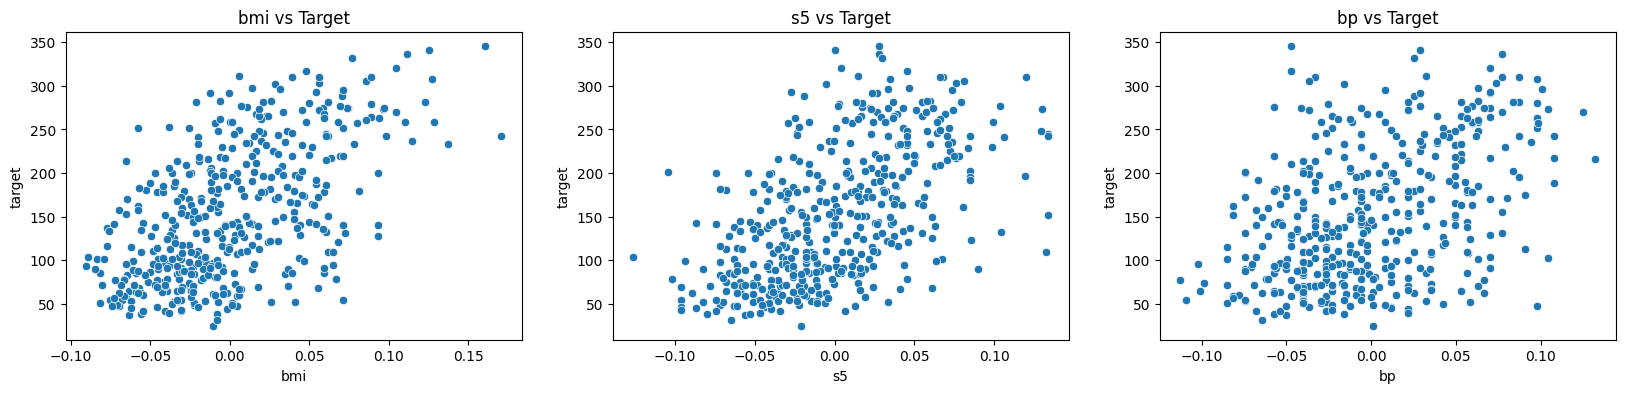

In [7]:
## do it in a loop to avoid repeating code
top_features = correlation_matrix["target"].drop("target").abs().sort_values(ascending=False).head(3).index.tolist()

plt.figure(figsize=(20, 4))
for i, feature in enumerate(top_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(data=df, x=feature, y="target")
    plt.title(f"{feature} vs Target")


plt.show()

#### Histogram:

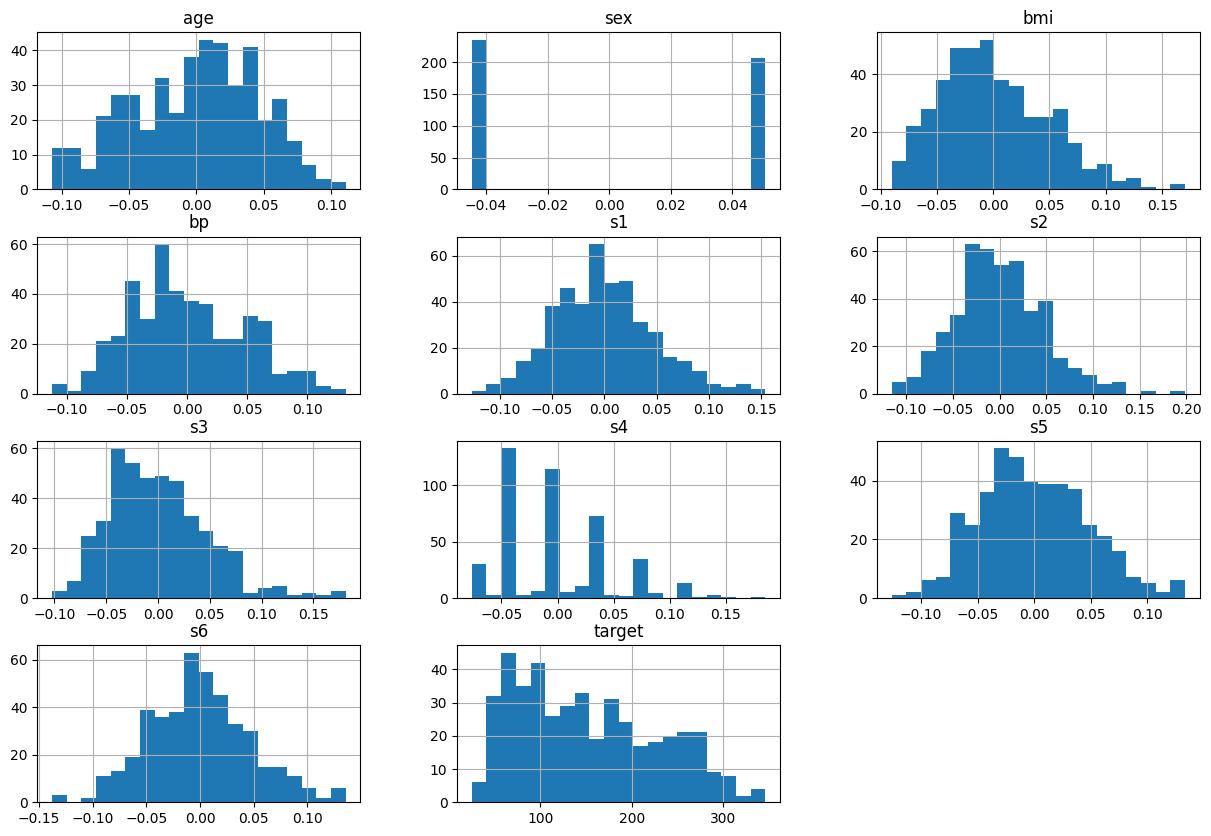

In [ ]:
df.hist(bins=20, figsize=(10, 10))
plt.show()

#### Heat Map:

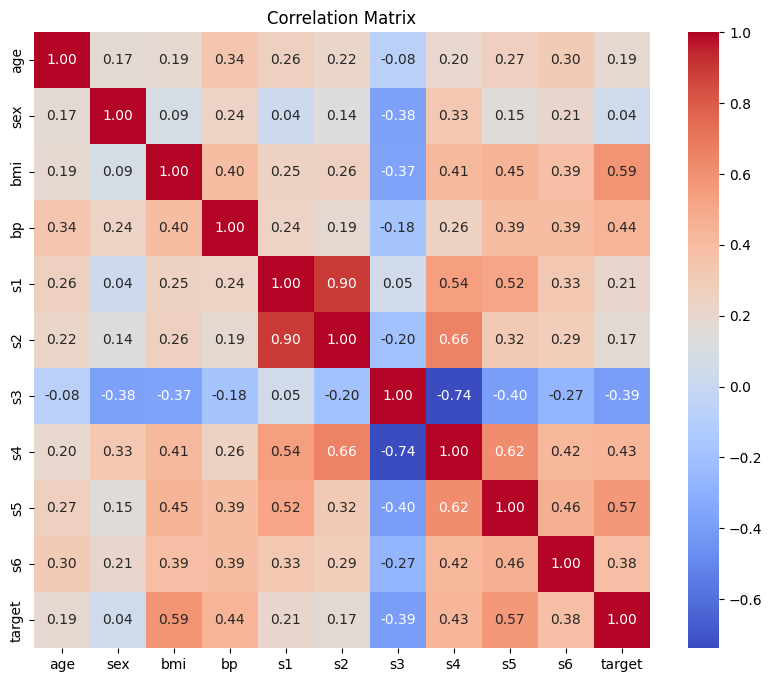

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

## Insights based on the  EDA plots:

1. There is a high correlation between BMI and disease progression:

The target vs. BMI scatter plot shows a strong positive trend, i.e., higher BMI values are associated with higher disease progression.

The correlation matrix confirms the same with a strong correlation coefficient of 0.59 between BMI and the target variable — one of the highest correlations observed.

2. The other notable features are S5 and BP:

S5 has a high positive correlation of 0.57 with the target.

Blood Pressure (bp) is positively correlated with 0.44, suggesting it's a good predictor.

3. Feature distributions are standardized and strongly symmetric:

Most of the features like age, bmi, bp, and s1–s6 are standardized around 0 and possess fairly normal distributions.

The target variable (disease progression) is right-skewed, i.e., more counts of lower progression cases and less for high progression cases.

4. There are strongly correlated features with each other:

S1 and S2 (both likely to be cholesterol or serum-related) are highly positively correlated at 0.9, indicating multicollinearity.

S3 and S4 are negatively correlated (-0.74), which may impact model interpretability.



### 4. Data Cleaning

In [9]:
df.isnull().sum()  # Check for missing values
##No missing values; no obvious outliers in EDA — no cleaning needed.

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### 5. Split Data Into Train, Validation, and Test

In [10]:
# Separate features and target
X = df.drop(columns='target')
y = df['target']

# Train (75%), validation (10%), test (15%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.10/0.85, random_state=42)

print(f'Train: {X_train.shape[0]} samples')
print(f'Validation: {X_val.shape[0]} samples')
print(f'Test: {X_test.shape[0]} samples')


Train: 330 samples
Validation: 45 samples
Test: 67 samples


## Part 2:  Doing the Univariate Polynomial Regression on BMI

### 6. Polynomial Regression Models (degrees 0 to 5)

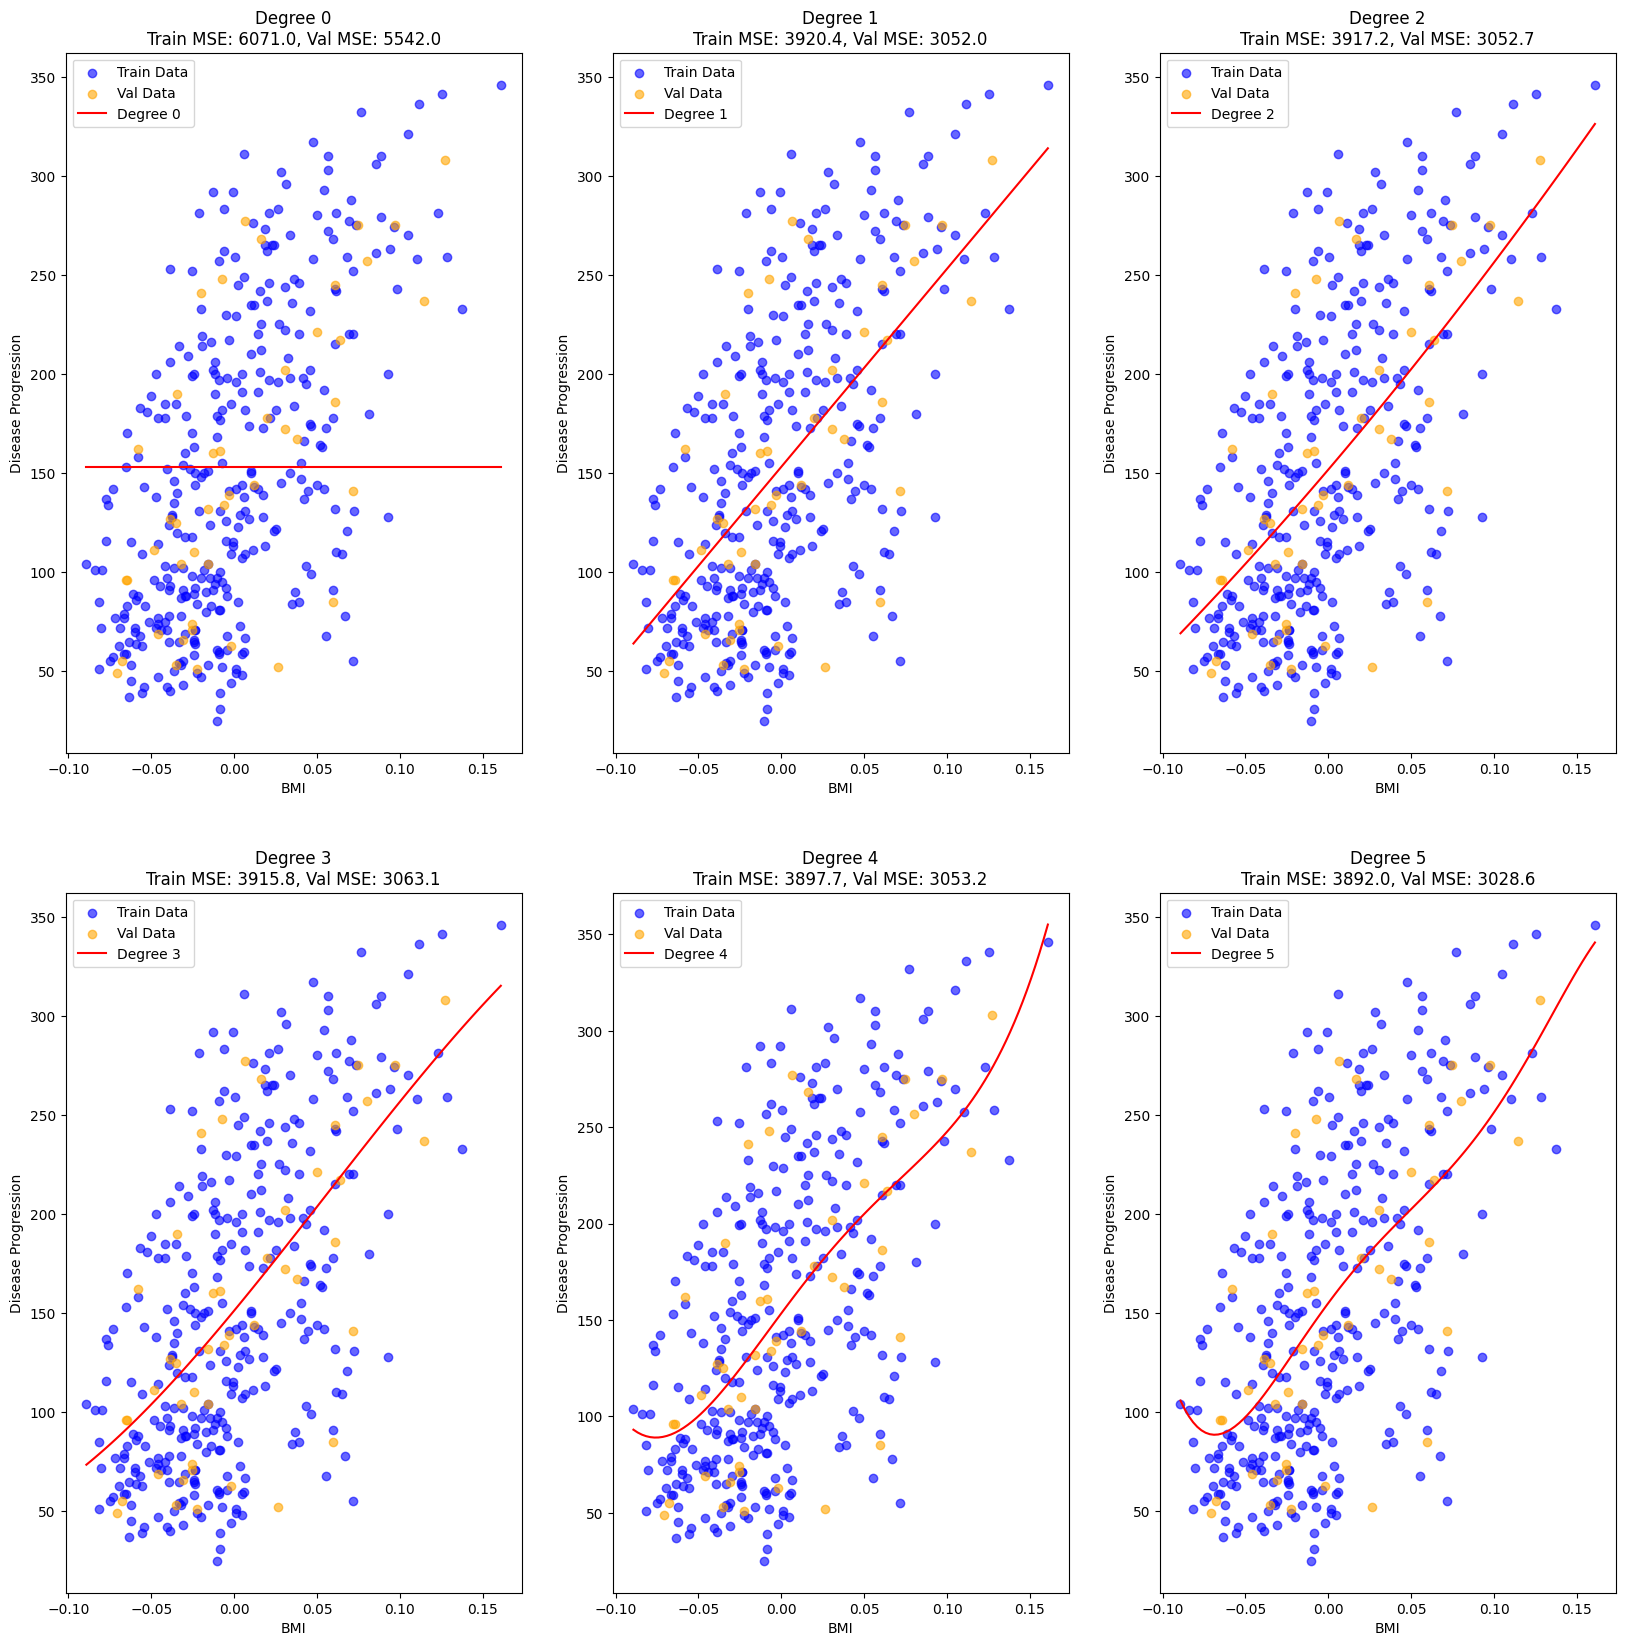

In [12]:
X_train_bmi = X_train[["bmi"]].values
X_val_bmi = X_val[["bmi"]].values
X_test_bmi = X_test[["bmi"]].values
y_train_bmi = y_train.values
y_val_bmi = y_val.values
results = []
degrees = range(6)
t_err = []
v_err = []
plt.figure(figsize=(20, 20))
results = []

for degree in (degrees):
    # Polynomial transformation
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train_bmi)
    X_val_poly = poly.transform(X_val_bmi)
        # Fit model  
    model = LinearRegression()  
    model.fit(X_train_poly, y_train_bmi)  

    # Predictions  
    y_train_pred = model.predict(X_train_poly)  
    y_val_pred = model.predict(X_val_poly)  

    # Plotting the fit  
    X_plot = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)  
    X_plot_poly = poly.transform(X_plot)  
    y_plot = model.predict(X_plot_poly)  

    plt.subplot(2, 3, degree + 1)  
    plt.scatter(X_train_bmi, y_train_bmi, alpha=0.6, label="Train Data", color="blue")  
    plt.scatter(X_val_bmi, y_val_bmi, alpha=0.6, label="Val Data", color="orange")  
    plt.plot(X_plot, y_plot, color="red", label=f"Degree {degree}")  
    plt.title(f"Degree {degree}\nTrain MSE: {mean_squared_error(y_train_bmi, y_train_pred):.1f}, Val MSE: {mean_squared_error(y_val_bmi, y_val_pred):.1f}")  
    plt.xlabel("BMI")  
    plt.ylabel("Disease Progression")  
    plt.legend()  

    # Metrics  
    r2_train = r2_score(y_train_bmi, y_train_pred)  
    mae_train = mean_absolute_error(y_train_bmi, y_train_pred)  
    mape_train = np.mean(np.abs((y_train_bmi - y_train_pred) / y_train_bmi)) * 100  

    r2_val = r2_score(y_val_bmi, y_val_pred)  
    mae_val = mean_absolute_error(y_val_bmi, y_val_pred)  
    mape_val = np.mean(np.abs((y_val_bmi - y_val_pred) / y_val_bmi)) * 100  

    results.append({  
        'Degree': degree,  
        'R2Train': round(r2_train, 4),  
        'Train MAE': round(mae_train, 2),  
        'Train MAPE': round(mape_train, 2),  
        'R2Val': round(r2_val, 4),  
        'MAEVal': round(mae_val, 2),  
        'MAPEVal': round(mape_val, 2)  
    })
    



### 7. Models comparison using the training and validation data.

In [13]:
results_df = pd.DataFrame(results)
print(results_df)

   Degree  R2Train  Train MAE  Train MAPE   R2Val  MAEVal  MAPEVal
0       0   0.0000      66.55       63.35 -0.0000   63.45    58.79
1       1   0.3542      52.28       48.46  0.4493   42.00    40.44
2       2   0.3548      52.27       48.45  0.4492   41.76    40.31
3       3   0.3550      52.22       48.36  0.4473   41.74    40.26
4       4   0.3580      51.94       47.96  0.4491   41.95    40.24
5       5   0.3589      51.81       47.83  0.4535   42.08    40.34


### 8. Identifing the best model


In [14]:
# Find the degree with the highest validation R²
best_deg = results_df.sort_values(by=['R2Val', 'MAEVal'], ascending=[False,True]).iloc[0]
best_degree_value = int(best_deg['Degree'])
print(f"Best model: Degree {best_degree_value}")

Best model: Degree 5


Based on highest R2 Val and lowest MAPE Val - Degree 5 looks good

### 9. Run chosen model (degree 5) on Test Set

In [15]:
# Using the best degree
poly_best = PolynomialFeatures(degree=best_degree_value)
X_train_poly = poly_best.fit_transform(X_train_bmi)
X_test_poly = poly_best.transform(X_test_bmi)

model_best = LinearRegression()
model_best.fit(X_train_poly, y_train)

y_test_pred = model_best.predict(X_test_poly)

# Test metrics
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"R2 Test: {r2_test:.3f}, MAE Test: {mae_test:.2f}, MAPE Test: {mape_test:.2f}%")


R2 Test: 0.197, MAE Test: 54.55, MAPE Test: 47.88%


### 10. Plot Train, Val, Test vs Model

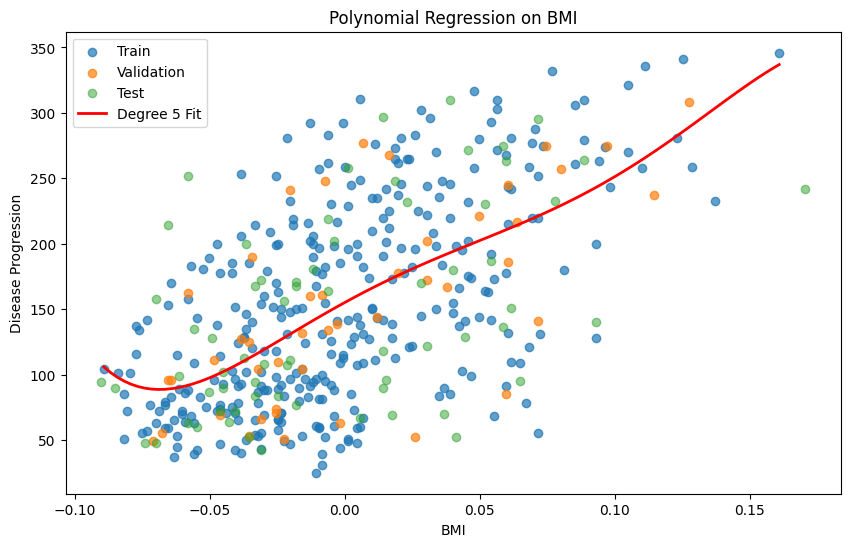

In [16]:
# Plot BMI vs Disease progression
plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train, alpha=0.7, label='Train')
plt.scatter(X_val_bmi, y_val, alpha=0.7, label='Validation')
plt.scatter(X_test_bmi, y_test, alpha=0.5, label='Test')

# Line of best fit
bmi_range = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)
bmi_poly = poly_best.transform(bmi_range)
y_fit = model_best.predict(bmi_poly)

plt.plot(bmi_range, y_fit, color='red', linewidth=2, label=f'Degree {best_degree_value} Fit')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.title('Polynomial Regression on BMI')
plt.show()


### 11. Equation of Best Model

In [17]:
poly_best = PolynomialFeatures(degree=best_degree_value)
X_train_poly = poly_best.fit_transform(X_train[['bmi']])

model_best = LinearRegression()
model_best.fit(X_train_poly, y_train)

# Get intercept and coefficients
intercept = model_best.intercept_
coefficients = model_best.coef_

# Print equation
feature_names = poly_best.get_feature_names_out(['bmi'])

print(f"Intercept: {intercept:.2f}")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.2f}")

Intercept: 155.08
1: 0.00
bmi: 1131.59
bmi^2: -3946.02
bmi^3: -26110.86
bmi^4: 768725.87
bmi^5: -2823251.97


### Equation
$$
\hat{y} = 155.08 + 1131.59 \cdot x - 3946.02 \cdot x^2 - 26110.86 \cdot x^3 + 768725.87 \cdot x^4 - 2823251.97 \cdot x^5
$$


### 12. Predict for Custom BMI Value (-0.05)

In [18]:
bmi_sample_value =np.array([[-0.05]])
print(f"Sample BMI value: {bmi_sample_value[0][0]}")
bmi_input_df = pd.DataFrame({'bmi': [bmi_sample_value]})
custom_bmi_poly = poly_best.transform(bmi_input_df)
predicted_progression = model_best.predict(custom_bmi_poly)
print(f"Predicted progression for BMI={bmi_sample_value[0][0]} is {predicted_progression[0]:.2f}")


Sample BMI value: -0.05
Predicted progression for BMI=-0.05 is 97.59


### 13. Quantifying Trainable Parameters

In [19]:
feature_names = poly_best.get_feature_names_out(['bmi'])
n_features = len(feature_names)

print(f"Trainable Parameters (including intercept): {n_features}")
print("Polynomial Features:", feature_names)

Trainable Parameters (including intercept): 6
Polynomial Features: ['1' 'bmi' 'bmi^2' 'bmi^3' 'bmi^4' 'bmi^5']


### 14. conclusion 

The best performing model was a univariate polynomial regression of degree 5, trained on the BMI feature. The model equation included 6 parameters: intercept + bmi + bmi² + bmi³ + bmi⁴ + bmi⁵. 

**Test R^2:** 0.197

**Test MAE:** 54.55

**Test MAPE:** 47.88%

The predicted disease progression for a patient with mean BMI = -0.05 was 97.59. The model fits well in the mid-range of BMI values but may overfit at extreme BMI values due to the high degree. 



## Part 3: Multivariate Models

### 1. Two polynomial models (degrees 2 and 3)

In [ ]:
# Degree 2
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train)
X_val_poly2 = poly2.transform(X_val)

model_poly2 = LinearRegression()
model_poly2.fit(X_train_poly2, y_train)

y_val_pred_poly2 = model_poly2.predict(X_val_poly2)

r2_val_poly2 = r2_score(y_val, y_val_pred_poly2)
mae_val_poly2 = mean_absolute_error(y_val, y_val_pred_poly2)
mape_val_poly2 = np.mean(np.abs((y_val - y_val_pred_poly2) / y_val)) * 100

print("Polynomial Degree 2")
print(f"R2 Val: {r2_val_poly2:.4f}, MAE: {mae_val_poly2:.2f}, MAPE: {mape_val_poly2:.2f}%")

# Degree 3
poly3 = PolynomialFeatures(degree=3)
X_train_poly3 = poly3.fit_transform(X_train)
X_val_poly3 = poly3.transform(X_val)

model_poly3 = LinearRegression()
model_poly3.fit(X_train_poly3, y_train)

y_val_pred_poly3 = model_poly3.predict(X_val_poly3)

r2_val_poly3 = r2_score(y_val, y_val_pred_poly3)
mae_val_poly3 = mean_absolute_error(y_val, y_val_pred_poly3)
mape_val_poly3 = np.mean(np.abs((y_val - y_val_pred_poly3) / y_val)) * 100

print("Polynomial Degree 3")
print(f"R2 Val: {r2_val_poly3:.4f}, MAE: {mae_val_poly3:.2f}, MAPE: {mape_val_poly3:.2f}%")


Polynomial Degree 2
R2 Val: 0.6030, MAE: 37.75, MAPE: 41.10%
Polynomial Degree 3
R2 Val: -115.9449, MAE: 287.18, MAPE: 193.21%
